# Importando Bibliotecas

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import erf, gamma
from time import time
plt.style.use('ggplot')

# Funções criadas

In [2]:
def media(arr):
    soma = 0
    for num in arr:
        soma += num

    return soma / len(arr)


def variancia(arr):
    mean = media(arr)
    sum = 0
    for num in arr:
        sum += (num-mean)**2

    res = sum / len(arr)
    return res
  

def gera_va(n):
    a, b, m = [9, 11, 2**32]
    seed = time()

    arr = np.zeros(n)
    arr[0] = seed
    for i in range(1, n):
        arr[i] = (a*arr[i-1] + b) % m

    arr = arr/(m-1) # Valores ficarão entre 0 e 1
    return arr


def histograma(arr, bins=10, w=0.2, c='royalblue'):
    menor = min(arr)
    maior = max(arr)
    intervalo = (maior-menor)/bins
    counted = np.zeros(bins)
    x = np.zeros(bins)

    for i in range(bins):
        quant = 0
        for num in arr:
            if menor <= num < menor+intervalo:
                quant += 1
        
        counted[i] = quant
        x[i] = menor
        menor += intervalo
    
    # Plotagem
    plt.bar(x, counted, align='edge', width=w, color=c)
    plt.title('Histograma')
    plt.ylabel('Ocorrências')
    plt.xlabel('X')
    plt.show()


def cdf_uniforme(x, a, b):
    arr = (x-a)/(b-a)
    return arr


def gera_uniforme(k, a, b):
    x = gera_va(k)
    # Utilizando a CDF inversa para gerar VAs com distribuição uniforme
    arr = a + (b-a)*x
    return np.sort(arr)


def cdf_exp(x, l):
    arr = 1 - np.exp(-1*l*x)
    return arr


def gera_exp(k, l):
    x = gera_va(k)
    # Utilizando a CDF inversa para gerar VAs com distribuição exponencial
    arr = (-1/l) * np.log(1 - x)
    return np.sort(arr)


def cdf_weibull(x, l, beta):
    arr = 1 - np.exp(-1*(x/l)**beta)
    return arr


def gera_weibull(k, l, beta):
    x = gera_va(k)
    # Utilizando a CDF inversa para gerar VAs com distribuição de Weibull
    arr = l*(-1*np.log(1-x))**(1/beta)
    return np.sort(arr)


def cdf_gauss(x, mi, sigma2):
    desv_padr = np.sqrt(sigma2)
    arr = (1/2)*erf((x-mi)/(desv_padr*np.sqrt(2))) + .5
    return arr


def gera_gauss(k, mi=0, sigma2=1):
    desv_padr = np.sqrt(sigma2)
    arr = np.zeros(k)
    
    # Soma de 12 VAs uniformes para gerar uma VA normal-padrao
    for _ in range(12):
        x = gera_va(k)
        arr = arr + x

    arr = arr - 6
    
    # Multiplica pelo desvio padrao e soma com a media para
    # ter uma VA X~N(mi, sigma2) desejada
    arr = arr*desv_padr + mi
    return np.sort(arr)


# 1) DISTRIBUIÇÃO UNIFORME

A Função de Densidade de Probabilidade (PDF) da distribuição uniforme é dada por: $ \\ f(X) = \begin{cases} \frac{1}{b-a} & x \in[a, b]\\0 & C.C. \end{cases} $
A Função de Distribuição Cumulativa (CDF) é dada por: $ \\F(X) = \begin{cases}0 & x < a \\\frac{x-a}{b-a} & x \in[a,b] \\1 & x > b\end{cases} $ 

In [3]:
a, b = 4, 12

## Histograma

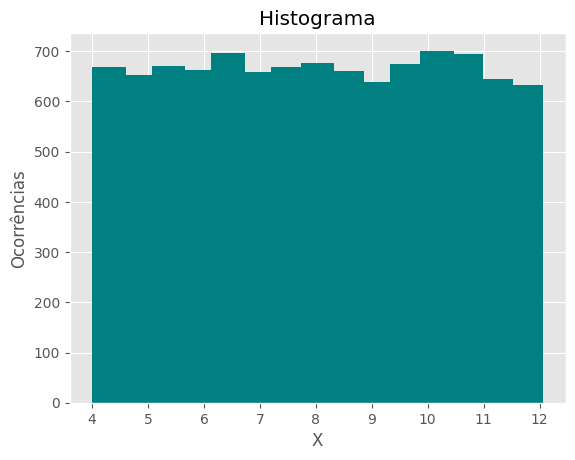

In [4]:
uni_va = gera_uniforme(10000, a, b)
histograma(uni_va, bins=15, c='teal', w=0.6)

## Gráfico da CDF

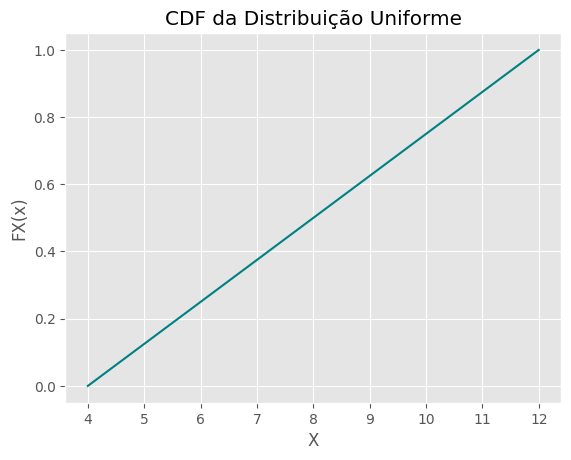

In [5]:
uni_fx = cdf_uniforme(uni_va, a, b)
plt.plot(uni_va, uni_fx, c='teal')
plt.title('CDF da Distribuição Uniforme')
plt.xlabel('X')
plt.ylabel('FX(x)')
plt.show()

## Média e Variância

Média da distribuição uniforme: $ \frac{1}{2}(a+b) $

Variância da distribuição uniforme: $ \frac{1}{12}(b-a)^{2} $

In [6]:
uni_media = media(uni_va)
uni_vari = variancia(uni_va)
print(f'Media experimental: {uni_media:.2f} \nMedia Teorica: {(a+b)/2:.2f}')
print(f'Variancia experimental: {uni_vari:.2f} \nVariancia Teorica: {(1/12)*(b-a)**2:.2f}')

Media experimental: 7.99 
Media Teorica: 8.00
Variancia experimental: 5.30 
Variancia Teorica: 5.33


# 2) DISTRIBUIÇÃO EXPONENCIAL

A Função de Densidade de Probabilidade (PDF) da distribuição exponencial é dada por: $ \\f(X) = \lambda e^{- \lambda x} \\ $
A Função de Distribuição Cumulativa (CDF) é dada por: $ \\F(X) = 1 - e^{-\lambda x} $  

In [7]:
lambda_exp = 3

## Histograma

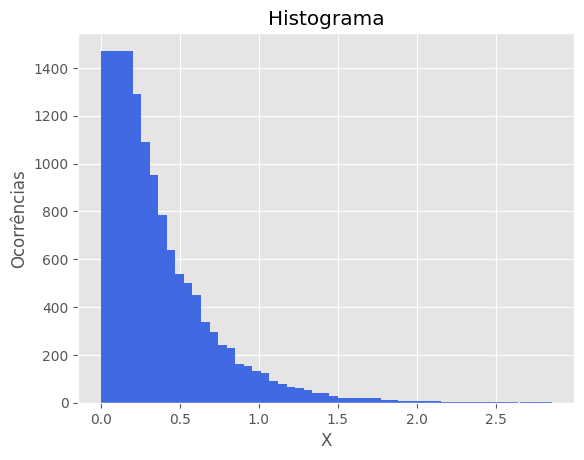

In [11]:
exp_va = gera_exp(10000, lambda_exp)
histograma(exp_va, bins=50)

## CDF da Exponencial

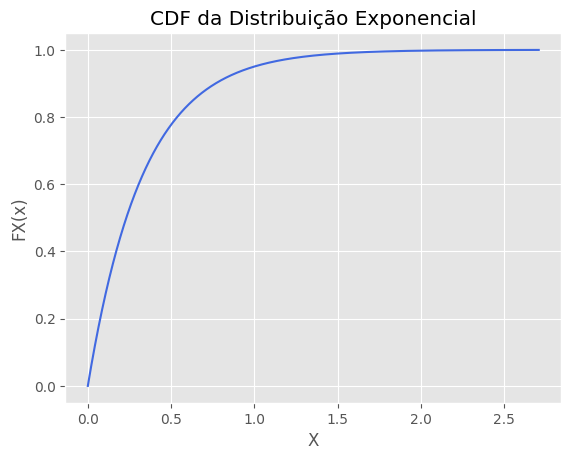

In [13]:
exp_fx = cdf_exp(exp_va, lambda_exp)
plt.plot(exp_va, exp_fx, c='royalblue')
plt.title('CDF da Distribuição Exponencial')
plt.xlabel('X')
plt.ylabel('FX(x)')
plt.show()

## Média e Variância

Média da distribuição exponencial: $ \\ E(X) = \frac{1}{\lambda} $

Variância da distribuição exponencial: $ \\ Var(X) = \frac{1}{\lambda^{2}} $

In [14]:
exp_media = media(exp_va)
exp_vari = variancia(exp_va)
print(f'Media experimental: {exp_media:.2f} \nMedia Teorica: {1/lambda_exp:.2f}')
print(f'Variancia experimental: {exp_vari:.2f} \nVariancia Teorica: {1/lambda_exp**2:.2f}')

Media experimental: 0.33 
Media Teorica: 0.33
Variancia experimental: 0.11 
Variancia Teorica: 0.11


# 3) DISTRIBUIÇÃO DE WEIBULL

A Função de Densidade de Probabilidade (PDF) da distribuição de weibull é dada por: $ \\ f(X) = \begin{cases}\frac{\beta}{\lambda}(\frac{x}{\lambda})^{\beta - 1} e^{-(x/\lambda)^\beta} & x >= 0\\0 & x < 0\end{cases} $
A Função de Distribuição Cumulativa (CDF) é dada por: $ \\F(X) = \begin{cases}1 - e^{-(x/\lambda)^\beta} & x >= 0\\0 & x < 0 \end{cases} $

In [15]:
lambda_weibull, beta = 1, .5

## Histograma

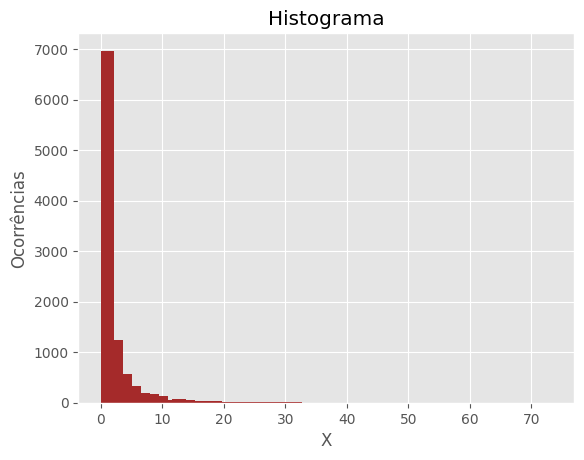

In [16]:
weibull_va = gera_weibull(10000, lambda_weibull, beta)
histograma(weibull_va, bins=50, w=2.2, c='brown')

## CDF da Distribuição de Weibull

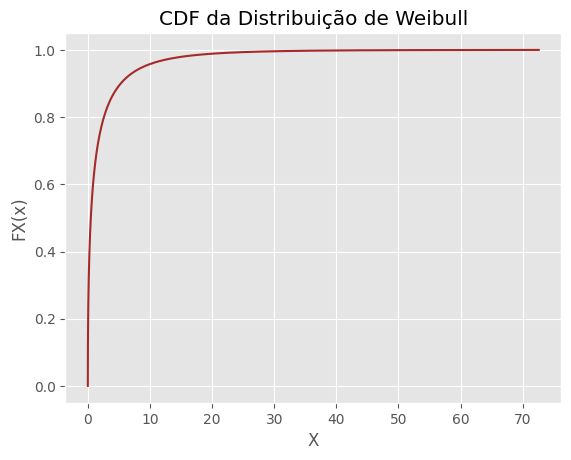

In [17]:
weibull_fx = cdf_weibull(weibull_va, lambda_weibull, beta)
plt.plot(weibull_va, weibull_fx, c='brown')
plt.title('CDF da Distribuição de Weibull')
plt.xlabel('X')
plt.ylabel('FX(x)')
plt.show()

## Média e variância

Média da distribuição de Weibull: $ \\ E(X) = \lambda\Gamma(1 + \frac{1}{\beta}) $

Variância da distribuição de Weibull: $  \\ Var(X) = \lambda^{2}\Bigg[\Gamma\Bigg(1+\frac{2}{\beta}\Bigg) - \Bigg(\Gamma\Bigg(1+\frac{1}{\beta}\Bigg)\Bigg)^{2}\Bigg] $

In [24]:
weibull_media = media(weibull_va)
weibull_vari = variancia(weibull_va)
print(f'Media experimental: {weibull_media:.2f} \nMedia Teorica: {lambda_weibull*gamma(1 + 1/beta):.2f}')
print(f'Variancia experimental: {weibull_vari:.2f} \nVariancia Teorica: {lambda_weibull**2 * (gamma(1 + 2/beta) - (gamma(1 + 1/beta))**2):.2f}')

Media experimental: 2.00 
Media Teorica: 2.00
Variancia experimental: 19.09 
Variancia Teorica: 20.00


# 4) DISTRIBUIÇÃO GAUSSIANA (OU NORMAL)

A Função de Densidade de Probabilidade (PDF) da Distribuição Gaussiana é dada por: $ \\ f(X) = \frac{1}{\sigma\sqrt{2\pi}} e^{-\frac{1}{2} (\frac{x-\mu}{\sigma })^{2}} $
A Função de Distribuição Cumulativa (CDF) é dada por: $ \\F(X) = \frac{1}{2}\Bigg[1 + erf\Bigg(\frac{x-\mu}{\sigma\sqrt{2}}\Bigg)\Bigg] $

In [19]:
mi, sigma2 = 6, 4

## Histograma

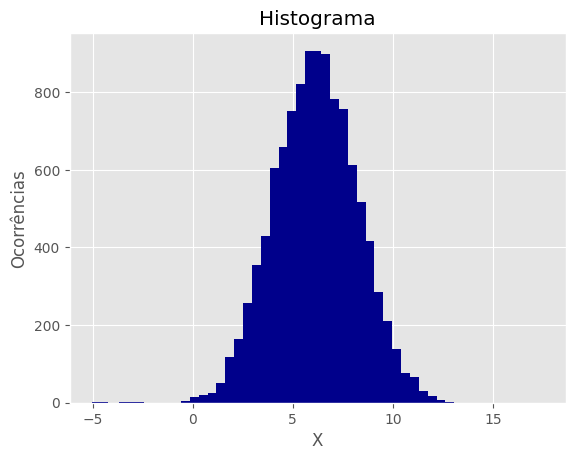

In [20]:
gauss_va = gera_gauss(10000, mi, sigma2)
histograma(gauss_va, bins=50, w=0.8, c='darkblue')

## CDF da Gaussiana

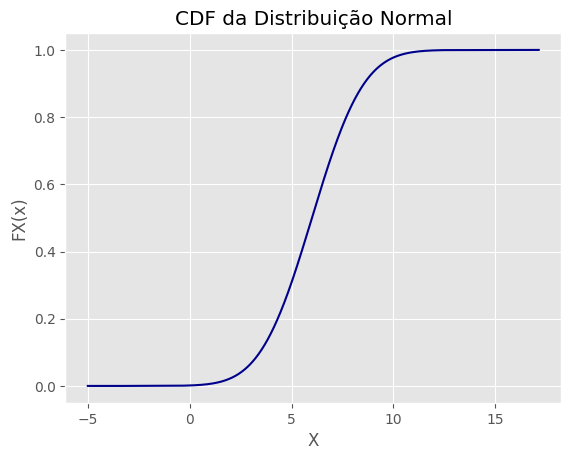

In [21]:
gauss_fx = cdf_gauss(gauss_va, mi, sigma2)
plt.plot(gauss_va, gauss_fx, c='darkblue')
plt.title('CDF da Distribuição Normal')
plt.xlabel('X')
plt.ylabel('FX(x)')
plt.show()

## Média e Variância

Média da distribuição uniforme: $ \\E(X) = \mu $

Variância da distribuição uniforme: $ \\Var(X) = \sigma^{2} $

In [22]:
gauss_media = media(gauss_va)
gauss_vari = variancia(gauss_va)
print(f'Media experimental: {gauss_media:.2f} \nMedia Teorica: {mi}')
print(f'Variancia experimental: {gauss_vari:.2f} \nVariancia Teorica: {sigma2}')

Media experimental: 5.97 
Media Teorica: 6
Variancia experimental: 3.97 
Variancia Teorica: 4
